# PHYS 381 ASSIGNMENT 2

### Simulating a pendelum without linear approximation (sin θ != θ) using the Runge-Kutta method

## Imports

In [193]:
import matplotlib.pylab as plt
# used to express figure axes as multiples of some constant (pi in this case)
import matplotlib.ticker as ticker
import numpy as np
import math

## Global Variables

In [194]:
# acceleration due to gravity
g = 1
# pendelum length
L = 1
# angular frequency
phi = 2.0 / 3.0
# amplitude
A = 0.0
# damping coefficient
k = 0.0
        

## Defining f

In [195]:
def f_nonlin(theta, omega, t):
    return  -(g / L) * math.sin(theta) - k * omega + A * math.cos(phi * t)

### Set up a function to simplify multiple simulations

In [196]:
def simulate_runge_kutta(theta_init, omega_init, dt):

    #init values
    theta = theta_init
    omega = omega_init
    t = 0.0

    # stores our output (time, theta, omega)
    data_log = []

    while(t < 100):
        k1a = dt * omega
        k1b = dt * f_nonlin(theta, omega, t)
        k2a = dt * (omega + k1b/2)
        k2b = dt * f_nonlin(theta + k1a/2, omega + k1b/2, t + dt/2)
        k3a = dt * (omega + k2b/2)
        k3b = dt * f_nonlin(theta + k2a/2, omega + k2b/2, t + dt/2)
        k4a = dt * (omega + k3b)
        k4b = dt * f_nonlin(theta + k3a, omega + k3b, t + dt)
        theta = theta + (k1a + 2 * k2a + 2 * k3a + k4a) / 6
        omega = omega + (k1b + 2 * k2b + 2 * k3b + k4b) / 6
        
        data_log.append( (t, theta, omega) )
        
        t = t + dt
        

    return data_log
    

## Re-introduce trapezoid method to compare

In [197]:
def simulate_trapezoid(theta_init, omega_init, dt):
    
    #init values
    theta = theta_init
    omega = omega_init
    t = 0.0

    # stores our output (time, theta, omega)
    data_log = []

    while(t < 100):
        k1a = dt * omega
        k1b = dt * f_nonlin(theta, omega, t)
        k2a = dt * (omega + k1b)
        k2b = dt * f_nonlin(theta + k1a, omega + k1b, t + dt)
        theta = theta + (k1a + k2a) / 2
        omega = omega + (k1b + k2b ) / 2
        
        data_log.append( (t, theta, omega) )
        
        t = t + dt
        
        

    return data_log

## Compare methods

### Gather data logs from each method

In [198]:
theta_init = 3.0
omega_init = 0.0

runge_kutta_dt_01_data_log = simulate_runge_kutta(theta_init,omega_init,0.1)
trapezoid_dt_01_data_log   = simulate_trapezoid(theta_init,omega_init,0.1)

runge_kutta_dt_001_data_log = simulate_runge_kutta(theta_init,omega_init,0.01)
trapezoid_dt_001_data_log   = simulate_trapezoid(theta_init,omega_init,0.01)

### Plot to compare

1001
1001
1001
1001
1001


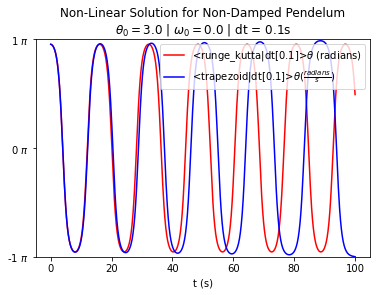

In [199]:
 # retrieve values from data_log
t_values  = [elem[0] for elem in runge_kutta_dt_01_data_log] #Should be same as trapezoid_data_log
theta_values_01_runge_kutta  = [elem[1] / math.pi for elem in runge_kutta_dt_01_data_log if elem[0] in t_values]
theta_values_01_trapezoid    = [elem[1] / math.pi for elem in trapezoid_dt_01_data_log if elem[0] in t_values]

theta_values_001_runge_kutta =  []
theta_values_001_trapezoid   =  []
itr = 0

for i  in range(len(runge_kutta_dt_001_data_log)):
    if(itr % 10 == 0):
        theta_values_001_runge_kutta.append(runge_kutta_dt_001_data_log[i][1] / math.pi)
        theta_values_001_trapezoid.append(runge_kutta_dt_001_data_log[i][1] / math.pi)
        
    itr += 1    
    
theta_values_001_runge_kutta.append(runge_kutta_dt_001_data_log[i][-1] / math.pi)
theta_values_001_trapezoid.append(runge_kutta_dt_001_data_log[i][-1] / math.pi)

print(len(t_values))
print(len(theta_values_01_runge_kutta))
print(len(theta_values_01_trapezoid))
print(len(theta_values_001_runge_kutta))
print(len(theta_values_001_trapezoid))

# setting up the figure 
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(1, 1, 1)

# placing axes
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(t_values, theta_values_01_runge_kutta,  'r', label=r'<runge_kutta|dt[0.1]>$\theta$ (radians)')
plt.plot(t_values, theta_values_01_trapezoid,    'b', label=r'<trapezoid|dt[0.1]>$\theta (\frac{radians}{s})$')

# express yaxis as multiples of pi
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1.0))

# should go from -pi to pi
plt.ylim([-1, 1])

# title graph
plt.title(  f'Non-Linear Solution for Non-Damped Pendelum'
                '\n'
            r'$\theta_0 = $' + f'{theta_init} | ' + r'$\omega_0 = $' + f'{omega_init}')

# label x as time
plt.xlabel("t (s)")

# show legend, and show plot
plt.legend(loc='upper right')

plt.savefig(f'./SavedPlots/Exercise_7_Part_d')
plt.show()

### This shows that the two plots diverge over time. It is more quickly noticible with larger dt values.

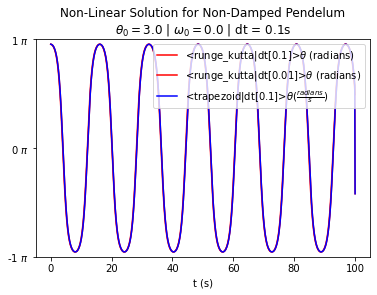

In [200]:
# setting up the figure 
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(1, 1, 1)

# placing axes
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(t_values, theta_values_01_runge_kutta,  'r', label=r'<runge_kutta|dt[0.1]>$\theta$ (radians)')
plt.plot(t_values, theta_values_001_runge_kutta,  'r', label=r'<runge_kutta|dt[0.01]>$\theta$ (radians)')
plt.plot(t_values, theta_values_001_trapezoid,    'b', label=r'<trapezoid|dt[0.1]>$\theta (\frac{radians}{s})$')

# express yaxis as multiples of pi
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1.0))

# should go from -pi to pi
plt.ylim([-1, 1])

# title graph
plt.title(  f'Non-Linear Solution for Non-Damped Pendelum'
                '\n'
            r'$\theta_0 = $' + f'{theta_init} | ' + r'$\omega_0 = $' + f'{omega_init}')

# label x as time
plt.xlabel("t (s)")

# show legend, and show plot
plt.legend(loc='upper right')

plt.savefig(f'./SavedPlots/Exercise_7_Part_d')
plt.show()

### Here, all of the functions appear identical. This shows that our runge-kutta plot is more accurate with higher dt values. Over time, runge-kutta will perform better than trapezoid for a given dt.